In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import RidgeCV

In [223]:
os.getcwd()

'C:\\Users\\leand'

In [2]:
beer_data=pd.read_csv('Consumo_cerveja.csv')
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
#translating the column names fom spanish to english
beer_data.columns=['date','mean_temp','max_temp','min_temp','precipitation','endofweek','beer_consumption_1000']

In [5]:
#missing values
beer_data.shape

(941, 7)

In [6]:
#this data is only fo the year 2015 comprising of 366 days so we can ignore rows 366 to 941 which contain missing data
beer_data=beer_data.iloc[0:365,:]
beer_data.shape

(365, 7)

In [7]:
#check for missing values
beer_data.isnull().sum()

date                     0
mean_temp                0
max_temp                 0
min_temp                 0
precipitation            0
endofweek                0
beer_consumption_1000    0
dtype: int64

In [8]:
#changing the index to start from 1 so it matches with the day of the year
beer_data.index= beer_data.index+1

In [9]:
beer_data.head()

,date,mean_temp,max_temp,min_temp,precipitation,endofweek,beer_consumption_1000
1,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
2,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
3,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
4,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
5,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [10]:
#we need to convert , into . and vice vesra as temp and rainfaill are usually epesented by decimal point notation and
#beer_consumption in thousands of litres

comma_to_dot = lambda x: x.replace(',','.')



In [11]:
beer_data.loc[:,['mean_temp','max_temp','min_temp','precipitation']]=beer_data.select_dtypes(['object']).iloc[:,1:5].applymap(comma_to_dot)

In [12]:
#assigning proper datatypes to the columns
beer_data['date']=pd.to_datetime(beer_data['date'])
str_cols=beer_data.select_dtypes(['object']).columns

for val in str_cols:
    beer_data[val]=pd.to_numeric(beer_data[val])
    

endofweekconv = lambda x : str(x)[0]
beer_data['endofweek']=beer_data.endofweek.apply(endofweekconv)


In [13]:
beer_data.dtypes

date                     datetime64[ns]
mean_temp                       float64
max_temp                        float64
min_temp                        float64
precipitation                   float64
endofweek                        object
beer_consumption_1000           float64
dtype: object

In [14]:
#adding day of week as a new column
beer_data['day']=beer_data['date'].dt.strftime("%A")

In [15]:
beer_data.head(9)

,date,mean_temp,max_temp,min_temp,precipitation,endofweek,beer_consumption_1000,day
1,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,Thursday
2,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,Friday
3,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,Saturday
4,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,Sunday
5,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,Monday
6,2015-01-06,23.78,20.1,30.5,12.2,0,28.218,Tuesday
7,2015-01-07,24.00,19.5,33.7,0.0,0,29.732,Wednesday
8,2015-01-08,24.90,19.5,32.8,48.6,0,28.397,Thursday
9,2015-01-09,28.20,21.9,34.0,4.4,0,24.886,Friday


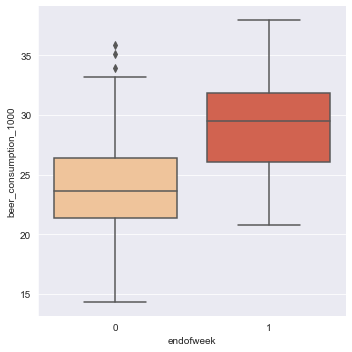

In [276]:
#It seems there is higher beer consumtion on weekends
sns.catplot(x="endofweek", y="beer_consumption_1000", kind="box", data=beer_data,palette='OrRd')

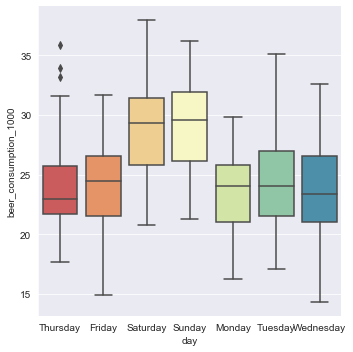

In [280]:
#There is a marked increase in beer consumtion on SATUDRAY and SUNDAY
sns.catplot(x="day", y="beer_consumption_1000", kind="box", data=beer_data,palette='Spectral')

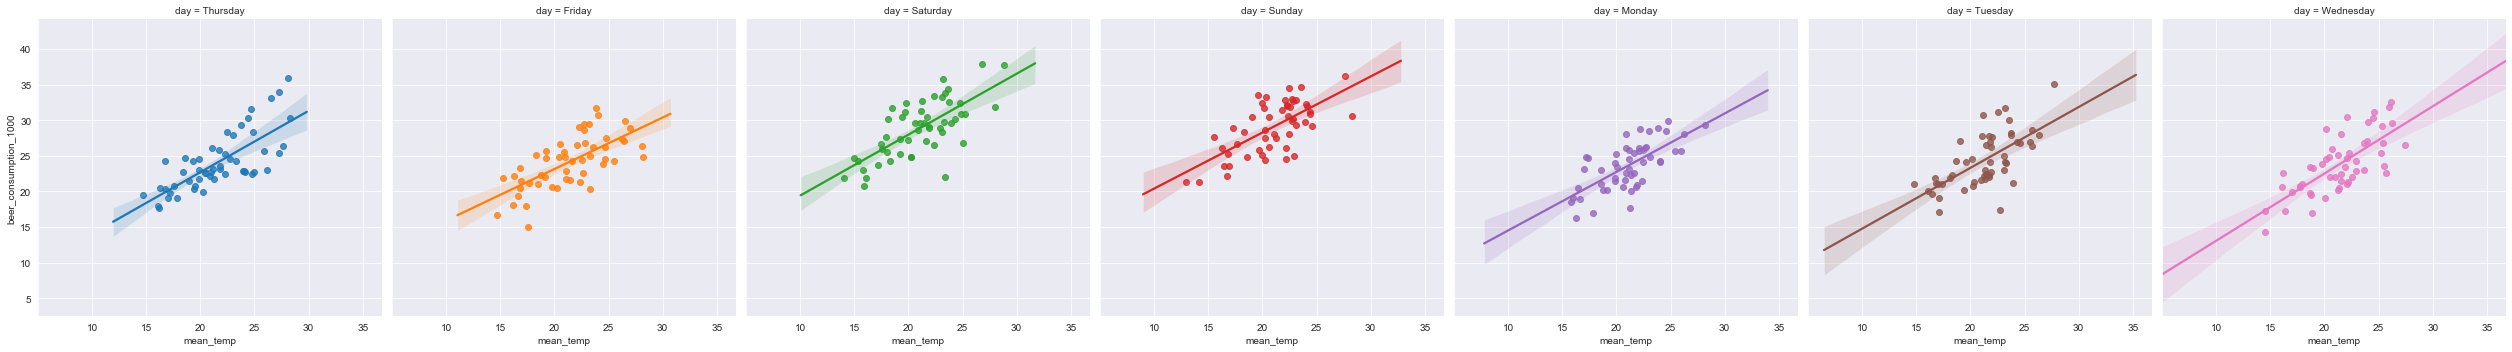

In [286]:
#There seems to be a positive relationship between temperature and beer consumption fo evey day of the week.
sns.lmplot(x="mean_temp", y="beer_consumption_1000", data=beer_data,hue='day',col='day');

Text(0.5, 1, 'consumption vs rainfall')

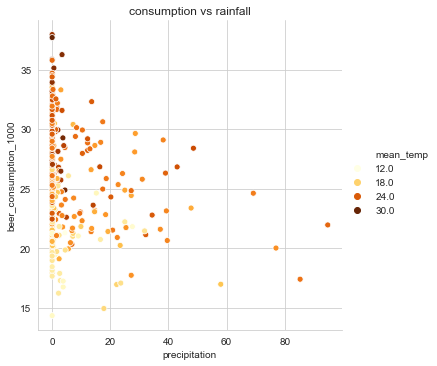

In [299]:
#Since most days of the year in So Paulo have little o no rainfall,it is hard to infer any relationship between rainfall and beer consumption 
sns.set_style("whitegrid")
sns.relplot(x="precipitation", y="beer_consumption_1000", data=beer_data,hue='mean_temp',palette="YlOrBr")
plt.title('consumption vs rainfall')

In [16]:
#adding a new binary ain? column
rainy=[]
def did_it_rain(rain):
    for val in rain:
        if val>0:
            rainy.append(1)
           
        elif val==0:
            rainy.append(0)

In [17]:
did_it_rain(beer_data['precipitation'])

k=pd.Series(rainy,name="rain?")
k.index=k.index+1
beer_data=pd.concat([beer_data,k],axis=1)

beer_data.head()

,date,mean_temp,max_temp,min_temp,precipitation,endofweek,beer_consumption_1000,day,rain?
1,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,Thursday,0
2,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,Friday,0
3,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,Saturday,0
4,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,Sunday,1
5,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,Monday,0


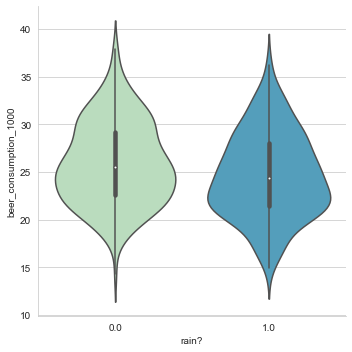

In [429]:
#we notice a slight increase in consumption on rainy days
sns.catplot(x="rain?", y="beer_consumption_1000",kind="violin", data=beer_data,palette='GnBu')

In [466]:
#grouping consumption by month of year into a new dataset called monthly_data
monthly_data=beer_data.iloc[:,[0,6]]
monthly_data['month']=monthly_data.date.dt.month


C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [489]:

monthly_data.index=np.arange(12)

In [490]:
monthly_data

,beer_consumption_1000,month
0,28.677645,1
1,25.673143,2
2,25.036387,3
3,24.624100,4
4,22.798387,5
5,23.627067,6
6,22.572871,7
7,25.908968,8
8,25.198133,9
9,27.653194,10


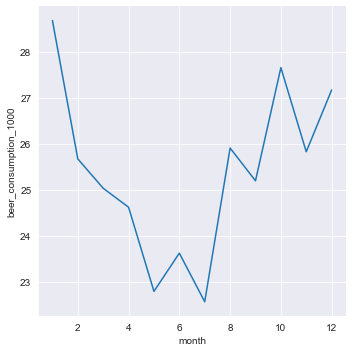

In [493]:
#Adding the month to the data we notice that the consumption of beer dips towards the middle of the year but not by much
sns.set_style("darkgrid")
sns.relplot(x="month", y="beer_consumption_1000",kind="line", data=monthly_data);

In [22]:
numeric_columns=beer_data.iloc[:,[1,2,3,4,6]].corr()



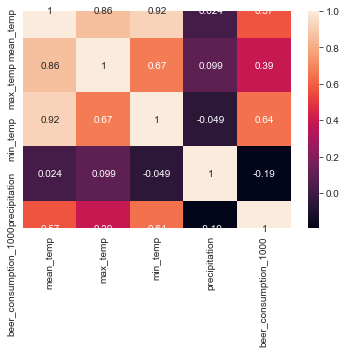

In [23]:
#None of the features are too correlated with beer consumtio
sns.heatmap(numeric_columns, annot=True)

In [24]:
cor_target = abs(numeric_columns["beer_consumption_1000"])

cor_target[cor_target>0.6]

min_temp                 0.642672
beer_consumption_1000    1.000000
Name: beer_consumption_1000, dtype: float64

In [19]:
reg_columns_data=beer_data.iloc[:,[1,2,3,4,5]]
reg_columns_target=beer_data.iloc[:,6]
reg_columns_data

,mean_temp,max_temp,min_temp,precipitation,endofweek
1,27.30,23.9,32.5,0.0,0
2,27.02,24.5,33.5,0.0,0
3,24.82,22.4,29.9,0.0,1
4,23.98,21.5,28.6,1.2,1
5,23.82,21.0,28.3,0.0,0
...,...,...,...,...,...
361,24.00,21.1,28.2,13.6,1
362,22.64,21.1,26.7,0.0,0
363,21.68,20.3,24.1,10.3,0
364,21.38,19.3,22.4,6.3,0


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


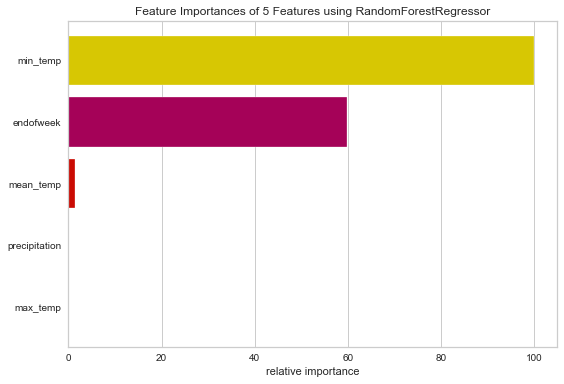

In [32]:
#Finding important features using a random forest model
rf = RandomForestRegressor(max_depth=2, random_state=0)
main_features = FeatureImportances(rf)
main_features.fit(reg_columns_data, reg_columns_target)
main_features.show()

In [28]:
#Choosing the temperature variables and end-of-week as the final features and split the data into test and train datasets
reg_data=reg_columns_data.iloc[:,[2,4]]

reg_target=beer_data.iloc[:,6]

X_train, X_test, y_train, y_test = train_test_split(reg_data,reg_target,random_state=1,shuffle=True,test_size=0.2)


In [29]:
#Running 5 fold cross validation on five different models
#(linear regression,LASSO,RIDGE,Random Forest,K neares neighbours)
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', linear_model.Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTREE', DecisionTreeRegressor()))
models.append(('RIDGE',Ridge(alpha=0.5)))

In [32]:
#lnear regression and Ridge have the lowest absolute error
results = []
names = []
for name, model in models:
    
    cv_results = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -2.024904 (0.116993)
LASSO: -2.731539 (0.129341)
KNN: -2.248236 (0.086699)
DTREE: -2.702475 (0.140801)
RIDGE: -2.024084 (0.117107)


In [33]:
#Even after acaling the data though standard scaler transformation ,lnear regression and Ridge have the lowest absolute error
pre_process = ColumnTransformer([
                      ('scale',StandardScaler(),['min_temp','endofweek']) ])
pipelines = []
pipelines.append(('SCALEDLR', Pipeline([('PR',pre_process),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('PR',pre_process),('LASSO', linear_model.Lasso())])))
pipelines.append(('ScaledIDGE', Pipeline([('PR',pre_process),('RIDGE', Ridge())])))
pipelines.append(('ScaledKNN', Pipeline([('PR',pre_process),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledTREE', Pipeline([('PR',pre_process),('CART', DecisionTreeRegressor())])))

results = []
names = []

for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SCALEDLR: -2.034520 (0.137741)
ScaledLASSO: -2.339683 (0.256080)
ScaledIDGE: -2.033867 (0.137458)
ScaledKNN: -2.149664 (0.114568)
ScaledTREE: -2.590317 (0.241393)


In [653]:
#tuning the alpha parameter
alphas = np.linspace(0.1, 1, 50)
clf = RidgeCV(alphas=alphas).fit(X_train, y_train)
clf.alpha_

0.2653061224489796

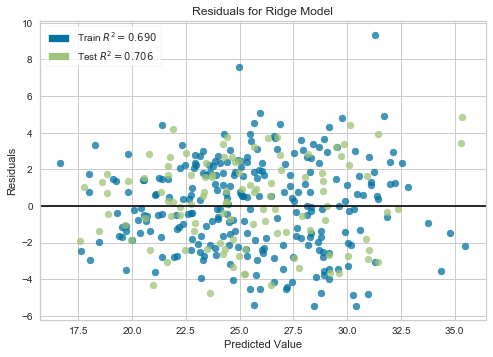

In [671]:
#plotting the residuals for the train and test data fo the Ridge model.
from yellowbrick.regressor import ResidualsPlot
lr = Ridge(alpha=.265)

lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
visualizer = ResidualsPlot(lr,hist=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure